# SMART CITY - ELECTRICITY MANAGEMENT

<h2>OUR DATA SETS: 

**Some info on the dataset**<br>
The dataset consists of 5 parts:<BR>
    1.**Daily_consumption**: Daily half-hourly measurements of electricity consumption of every household(Dec 2011-Jan 2014)<br>
    2.**Daily_weather**: Daily important meteorological information from darksky api<br>
    3.**Households**: Information about each household type of charge and acorn classification<br>
    4.**Holidays**: Days that London does not work<br>
    5.**Acorn**: Extended information about every acorn's population<br>

**More clarifying info**<br>
**Acorn**:Acorn is a powerful consumer classification that segments the UK population. By analysing demographic data, social factors, population and consumer behaviour, it provides precise information and an understanding of different types of people.
(more info: https://acorn.caci.co.uk/)<br>
**Dynamic charge**:The tariff prices were given a day ahead via the Smart Meter IHD (In Home Display) or text message to mobile phone. Customers were issued High (67.20p/kWh), Low (3.99p/kWh) or normal (11.76p/kWh) price signals and the times of day these applied. All non-Time of Use customers were on a flat rate tariff of 14.228pence/kWh.<br>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
#loading the data
acorn = pd.read_csv("acorn_details.csv")
households = pd.read_csv("informations_households.csv")
holidays = pd.read_csv("uk_bank_holidays.csv")
daily_weather = pd.read_csv("weather_daily_darksky.csv")
daily_consumption = pd.read_csv("daily_dataset.csv")

**Clean null values**

In [9]:
#drop null rows
acorn = acorn.dropna()
households = households.dropna()
holidays = holidays.dropna()
daily_weather = daily_weather.dropna()
daily_consumption = daily_consumption.dropna()

<h3> ACORN

Details on the acorn groups and their profile of the people in the group, it's come from this xlsx spreadsheet.The first three columns are the attributes studied, the ACORN-X is the index of the attribute. At a national scale, the index is 100 if for one column the value is 150 it means that there are 1.5 times more people with this attribute in the ACORN group than at the national scale.

In [4]:
acorn

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,LEISURE TIME,Holiday Destination/Type,Asia,171.0,137.0,94.0,220.0,196.0,69.0,122.0,95.0,72.0,97.0,124.0,73.0,57.0,49.0,96.0,113.0,63.0
822,LEISURE TIME,Holiday Destination/Type,Activity / Outdoor Sports,298.0,278.0,138.0,119.0,93.0,96.0,113.0,96.0,84.0,96.0,56.0,48.0,48.0,46.0,23.0,23.0,23.0
823,LEISURE TIME,Holiday Destination/Type,Cruise,272.0,295.0,272.0,44.0,44.0,70.0,70.0,70.0,70.0,70.0,28.0,28.0,28.0,28.0,49.0,49.0,49.0
824,LEISURE TIME,Holiday Destination/Type,Package,196.0,186.0,166.0,49.0,49.0,101.0,101.0,121.0,106.0,101.0,48.0,75.0,75.0,75.0,54.0,54.0,54.0


<h3>HOUSEHOLD

This datasets contains all the information on the households in the panel (their acorn group, their tariff)

In [5]:
households

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111


<h3> Daily Weather

That contains theaily data from darksky api

In [6]:
daily_weather

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123.0,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198.0,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225.0,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232.0,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252.0,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,9.03,2014-01-26 16:00:00,233.0,partly-cloudy-day,2.39,2014-01-26 21:00:00,0.40,4.55,1002.10,2014-01-26 22:00:00,...,9.03,2014-01-26 07:48:49,2014-01-26 16:00:00,2014-01-26 11:00:00,Mostly cloudy until evening.,2014-01-27 05:00:00,-1.30,2014-01-26 15:00:00,2014-01-27 04:00:00,0.84
878,10.31,2014-02-27 14:00:00,224.0,partly-cloudy-day,3.08,2014-02-27 23:00:00,0.32,4.14,1007.02,2014-02-27 22:00:00,...,10.31,2014-02-27 06:51:45,2014-02-27 14:00:00,2014-02-27 12:00:00,Partly cloudy until evening.,2014-02-28 02:00:00,1.41,2014-02-27 14:00:00,2014-02-28 02:00:00,0.93
879,18.97,2014-03-09 14:00:00,172.0,partly-cloudy-night,4.30,2014-03-09 07:00:00,0.04,2.78,1022.44,2014-03-09 07:00:00,...,18.97,2014-03-09 06:29:49,2014-03-09 14:00:00,2014-03-09 12:00:00,Partly cloudy in the evening.,2014-03-10 05:00:00,7.08,2014-03-09 14:00:00,2014-03-10 06:00:00,0.28
880,8.83,2014-02-12 16:00:00,210.0,wind,1.94,2014-02-12 01:00:00,0.59,7.24,994.27,2014-02-12 01:00:00,...,8.83,2014-02-12 07:21:44,2014-02-12 16:00:00,2014-02-12 10:00:00,Mostly cloudy until evening and breezy through...,2014-02-13 05:00:00,-1.20,2014-02-12 16:00:00,2014-02-13 02:00:00,0.42


<h3> Daily consumption

This data set contains the daily information like the number of measures, minimum, maximum, mean, median, sum and std. 

Our main interest is energy_mean, the average half-hourly energy consumption in one day

In [7]:
daily_consumption

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066
...,...,...,...,...,...,...,...,...,...
3510427,MAC004977,2014-02-23,0.1365,0.174646,0.754,48,0.151583,8.383,0.046
3510428,MAC004977,2014-02-24,0.0950,0.118458,0.580,48,0.093814,5.686,0.052
3510429,MAC004977,2014-02-25,0.0675,0.084208,0.176,48,0.037107,4.042,0.046
3510430,MAC004977,2014-02-26,0.1080,0.120500,0.282,48,0.069332,5.784,0.046


<h3>Holidays

In [5]:
holidays

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)
5,2012-07-05,Early May bank holiday
6,2012-09-04,Easter Monday
7,2012-06-04,Good Friday
8,2012-02-01,New Year?s Day (substitute day)
9,2013-12-26,Boxing Day


<h2> DIAGRAMS

<IPython.core.display.Javascript object>


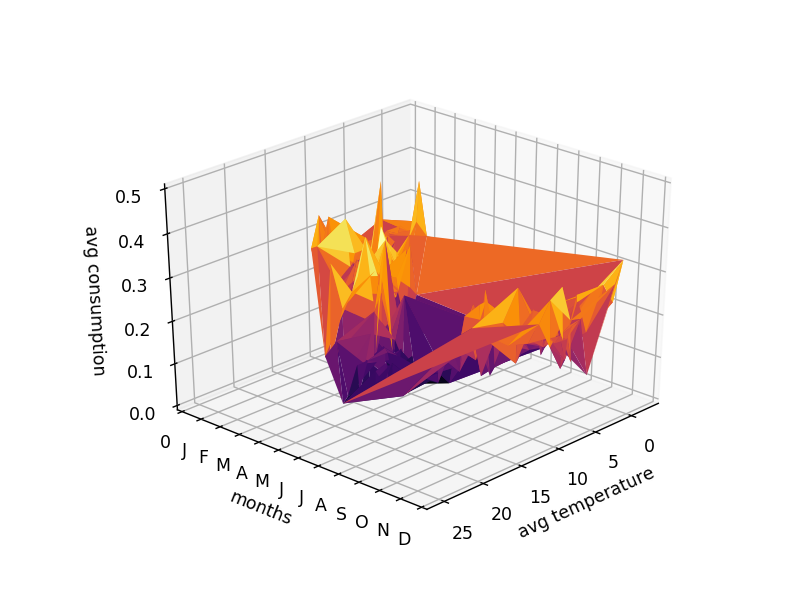

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
%matplotlib notebook

daily_consumption_temp = daily_consumption.iloc[17:374]
daily_weather_temp = daily_weather.sort_values(by = ['time']).iloc[59:416]

a = range(357)
    
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(daily_weather_temp['temperatureMin']/2 + daily_weather_temp['temperatureMax'].astype(float)/2, a, daily_consumption_temp['energy_mean'], 
                cmap=plt.cm.inferno, linewidth=0.2)
ax.view_init(30,1)

ax.set_ylim(0, 360)
plt.yticks(np.arange(0,361, 30),('0','J','F','M','A','M','J','J','A','S','O','N','D'))

ax.set_zlim(0, 0.5)


ax.set_xlabel('avg temperature')
ax.set_ylabel('months')
ax.set_zlabel('avg consumption')

plt.gca();  

<h3> Daily average consumption

C:\Users\ioann\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


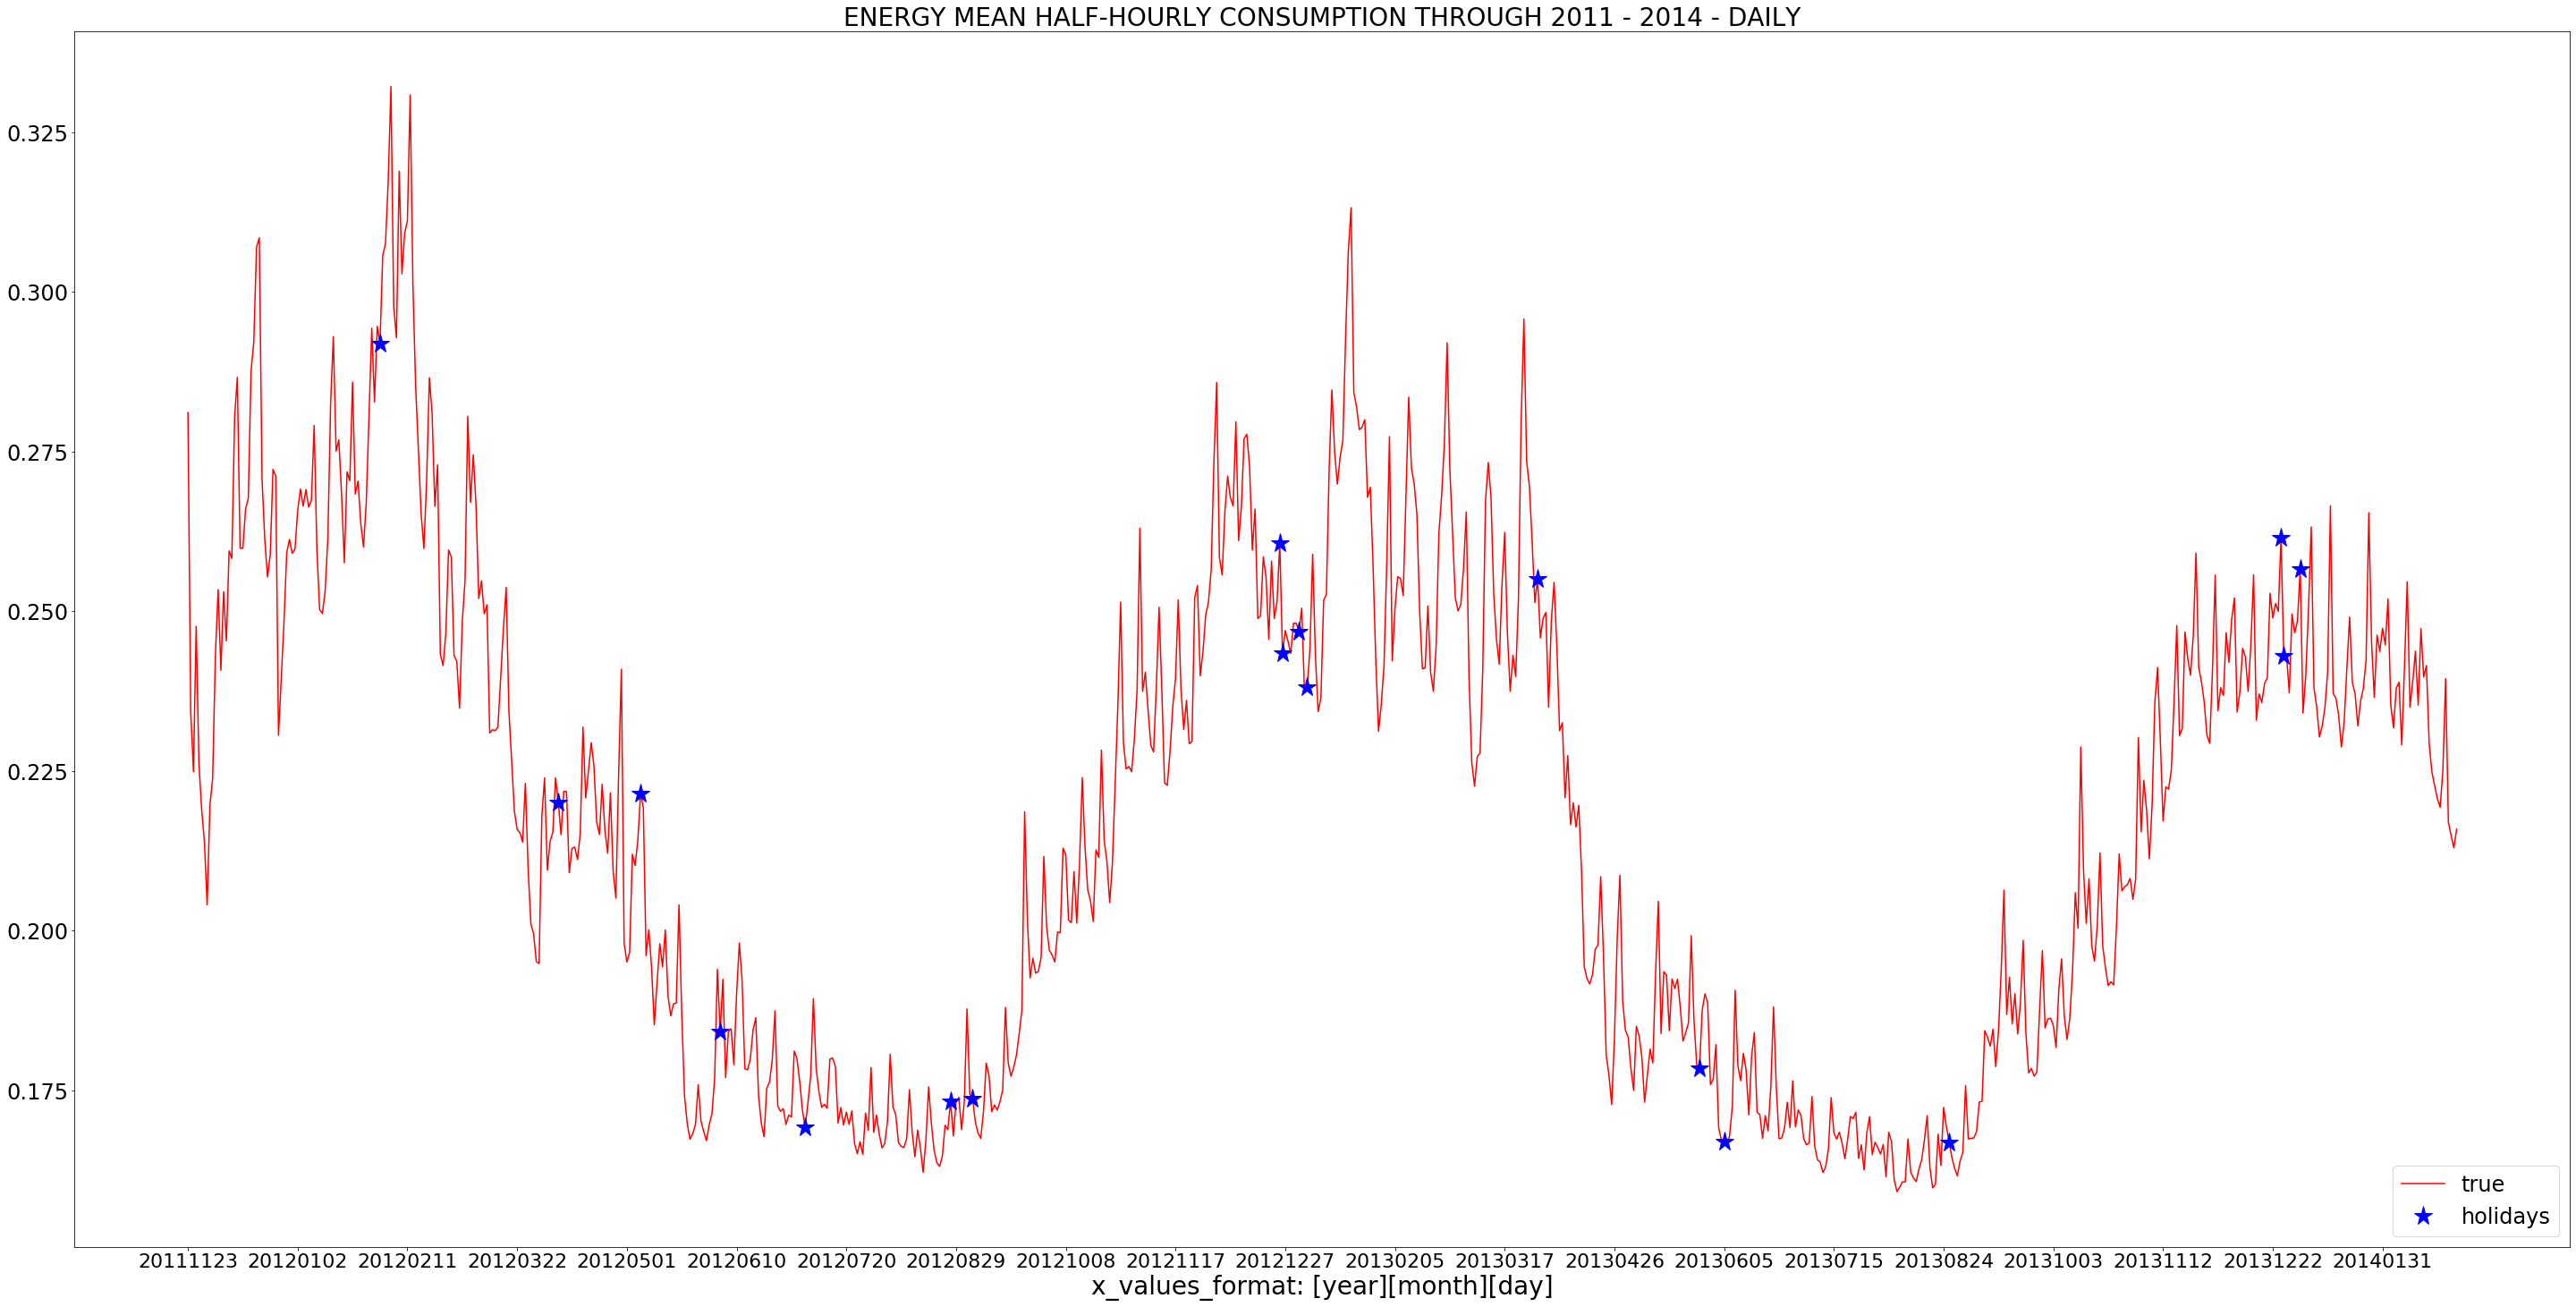

In [10]:
%matplotlib inline

daily_consumption['day'] = daily_consumption['day'].str.replace('-', '')
holidays['Bank holidays'] = holidays['Bank holidays'].str.replace('-', '')
x_time = daily_consumption.day.unique()
x_holidays = holidays['Bank holidays'].unique()
y = np.zeros(x_time.shape) #will be used later for regression
y_holidays = np.zeros(x_holidays.shape[0]-7)
x_time.sort()
x_holidays.sort()

j=0
for i in range (0, x_time.shape[0]):
    y[i] = (daily_consumption[daily_consumption.day == x_time[i]].energy_mean.mean())
    if(x_time[i] == x_holidays[j]):
        y_holidays[j] = y[i]
        j = j + 1
        
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)
plt.rc('axes', titlesize=28)
plt.rc('axes', labelsize=28)
plt.rc('legend', fontsize=24) 
fig, axes = plt.subplots(1, 1, figsize=(50, 25))
axes.plot(x_time, y, 'r', label = 'true') 
axes.plot(x_holidays[:-7], y_holidays, '*b', markersize = 22, label = 'holidays')
axes.set_xticks(x_time[::40])
axes.set_xlabel('x_values_format: [year][month][day]')
axes.legend(loc=4)
plt.title("ENERGY MEAN HALF-HOURLY CONSUMPTION THROUGH 2011 - 2014 - DAILY")
fig.show()

<h3> Average daily consumption chart - Type of charge

C:\Users\james\Anaconda3\envs\pep_env\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


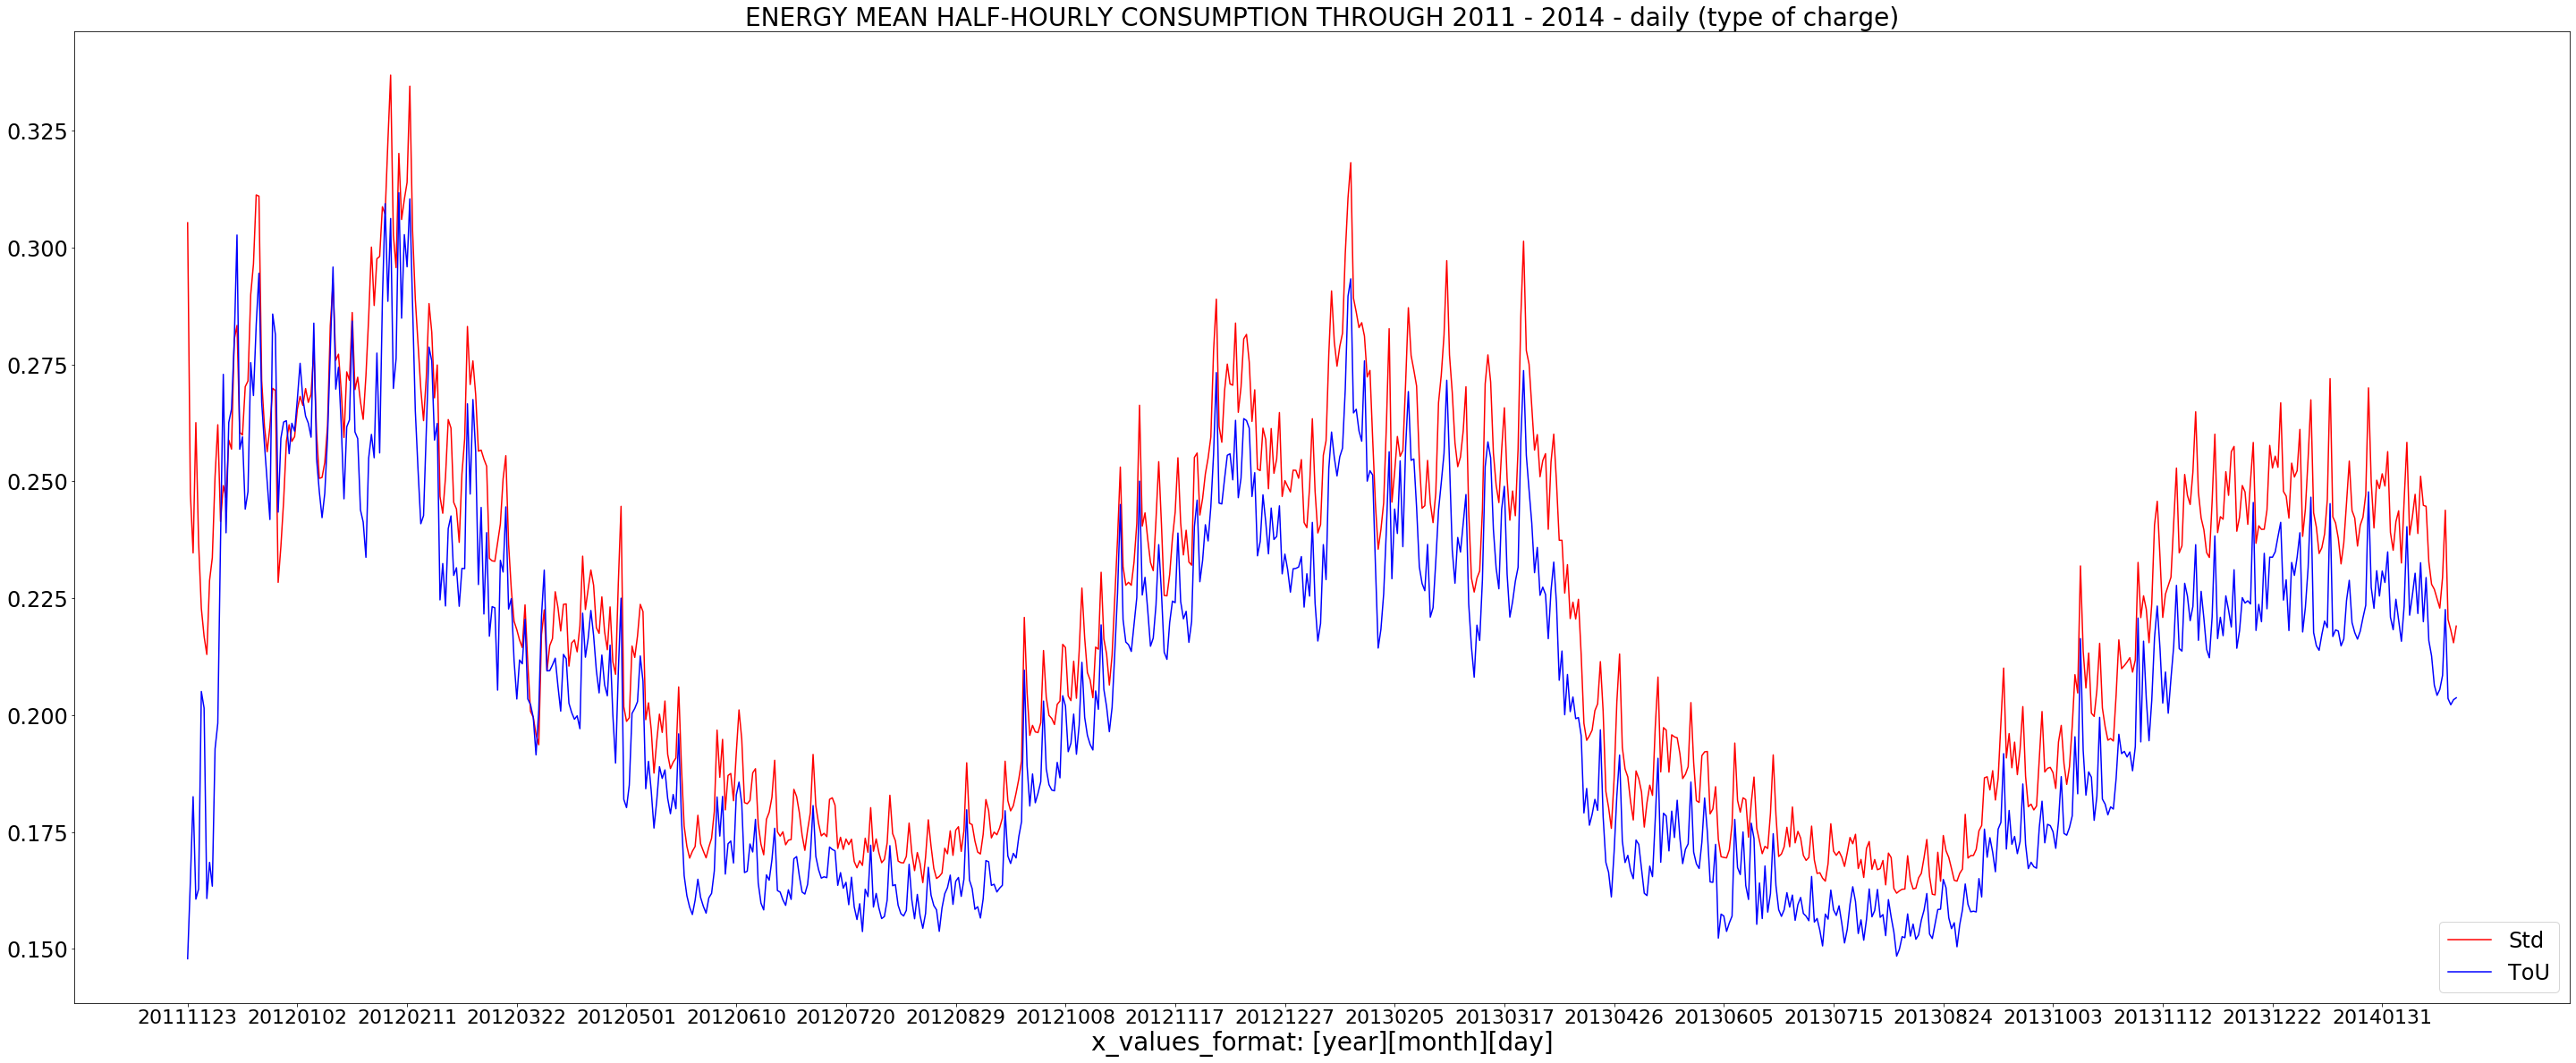

In [86]:
%matplotlib inline
y_std = np.zeros(x_time.shape)
y_dyn = np.zeros(x_time.shape)

daily_consumption2 = pd.merge(daily_consumption, households, on = 'LCLid')
daily_consumption2['day'] = daily_consumption2['day'].str.replace('-', '')

for i in range (0, x_time.shape[0]):
    y_std[i] = (daily_consumption2[(daily_consumption2.day == x_time[i]) & (daily_consumption2.stdorToU == 'Std')].energy_mean.mean())
    y_dyn[i] = (daily_consumption2[(daily_consumption2.day == x_time[i]) & (daily_consumption2.stdorToU == 'ToU')].energy_mean.mean())

fig, axes = plt.subplots(1, 1, figsize=(50, 20))
axes.plot(x_time, y_std, 'r', label = 'Std')
axes.plot(x_time, y_dyn, 'b', label = 'ToU')
axes.set_xticks(x_time[::40])
axes.set_xlabel('x_values_format: [year][month][day]')
axes.legend(loc=4)
plt.title("ENERGY MEAN HALF-HOURLY CONSUMPTION THROUGH 2011 - 2014 - daily (type of charge)")
fig.show()

>**This graph illustrates that consumers with standard charge tend to consume slightly more electrical energy than those with dynamic type of charge**

<h3>Bar Graph - Average consumption per type of charge

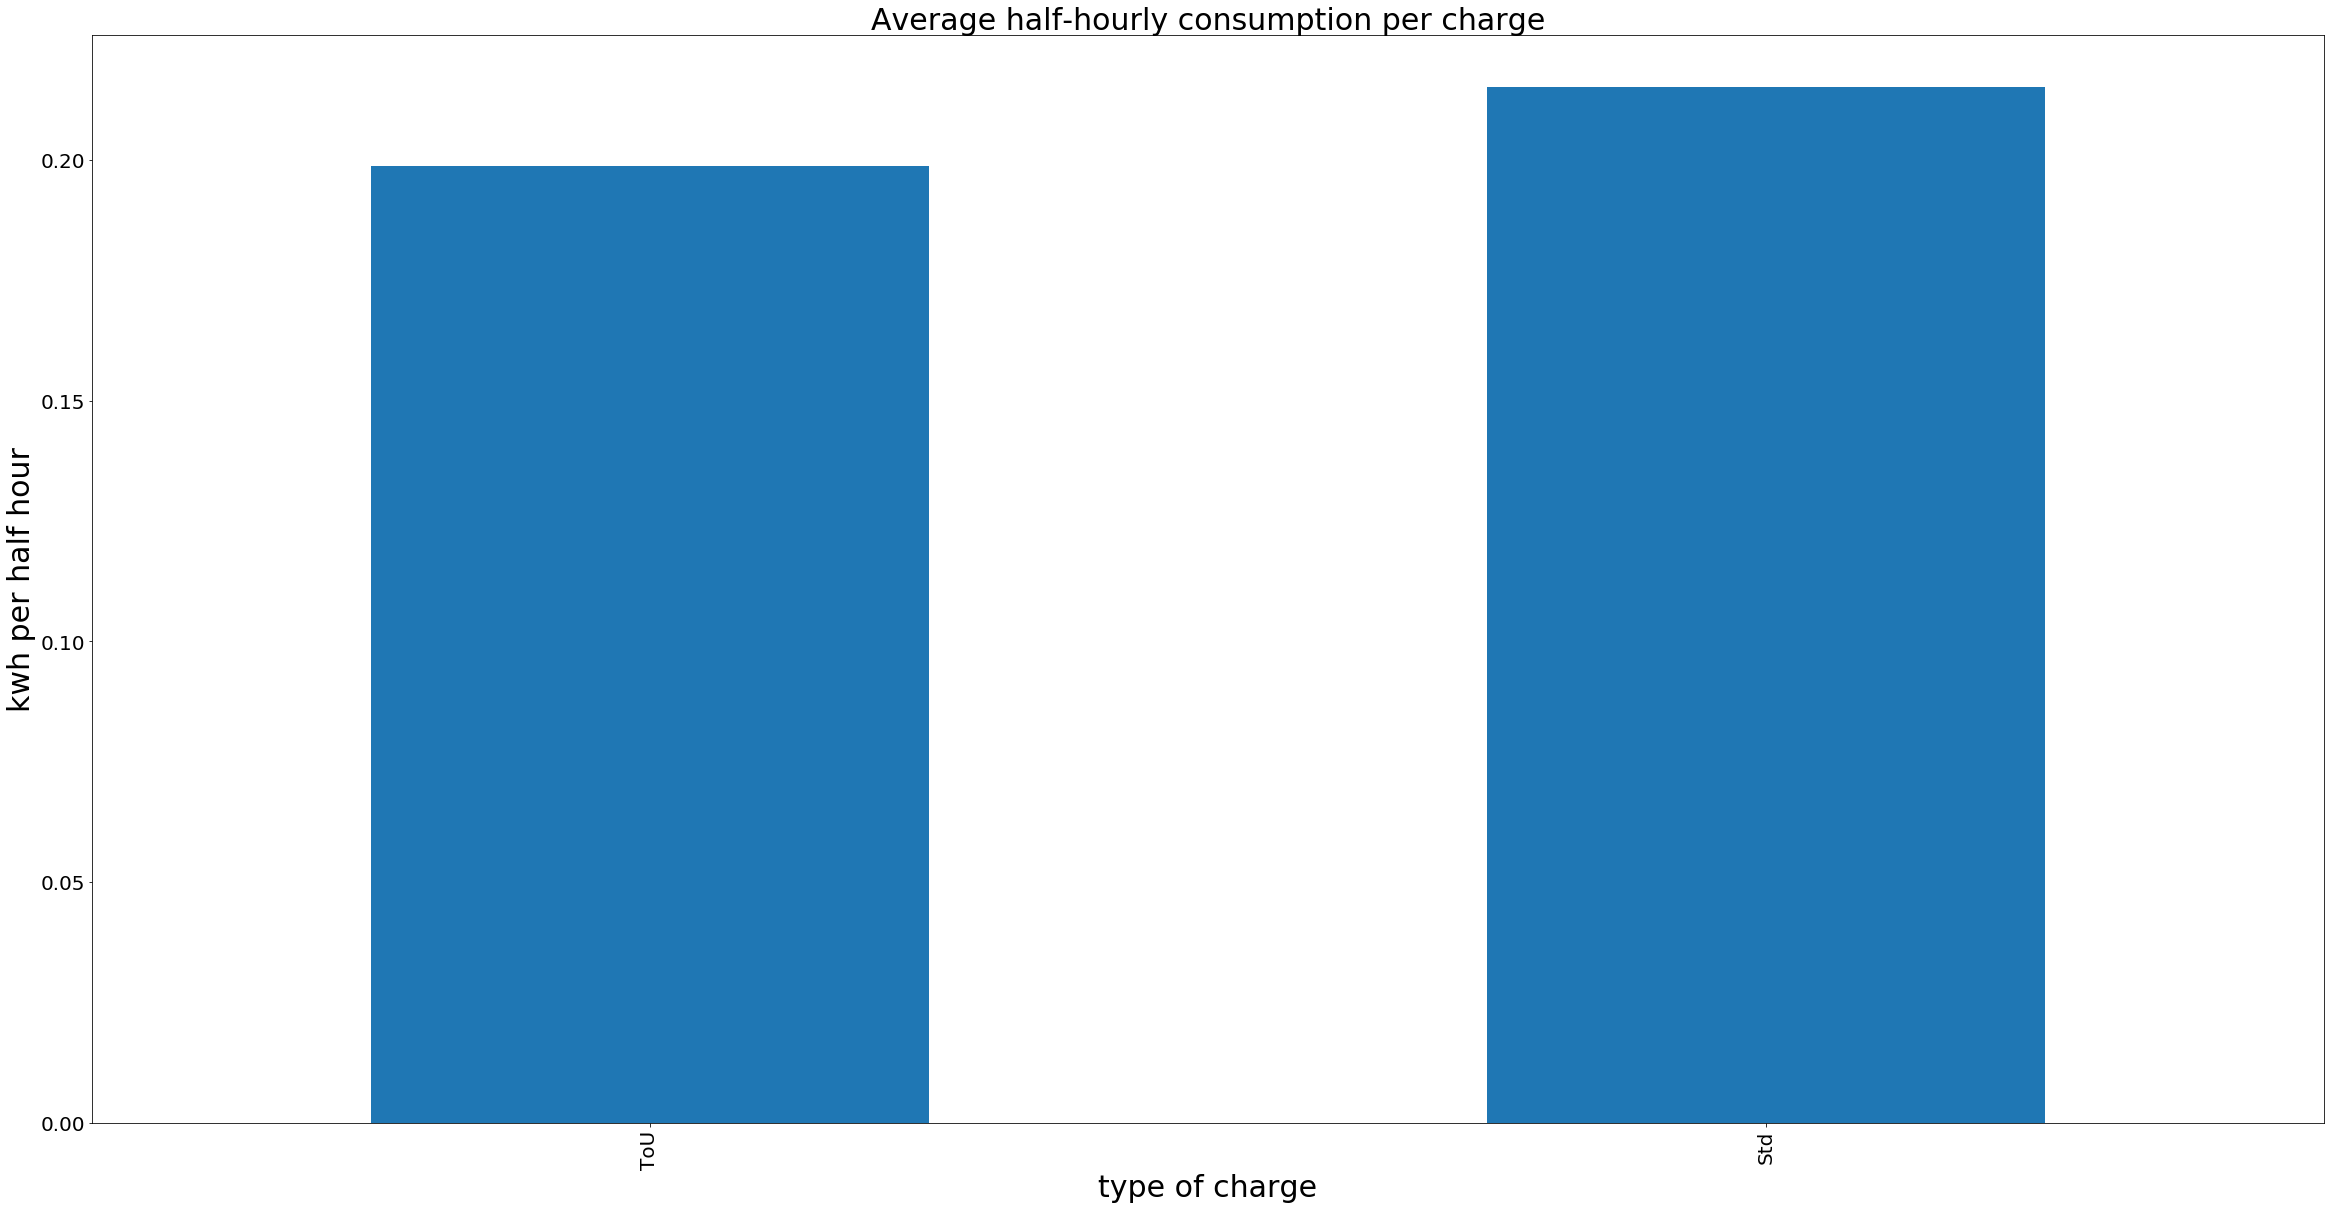

In [82]:
consumption_temp = daily_consumption[['energy_mean', 'LCLid']]
household_temp = households[['stdorToU', 'LCLid']]
result = pd.merge(consumption_temp, household_temp, on = 'LCLid')

cons_per_charge = np.zeros(2)
block = ['ToU','Std']

for i in range(0,2):
    cons_per_charge[i] = np.mean(result[result.stdorToU == block[i]].energy_mean.values)
   
lista = {}
for i in range (0,2):
    lista.update({block[i]:cons_per_charge[i]})
stock = pd.Series(lista)
ax = stock.plot(kind='bar', figsize = (40,20), fontsize = 20)
ax.set_title(label = 'Average half-hourly consumption per charge', fontsize = 30)
ax.set_xlabel("type of charge", fontsize = 30)
ax.set_ylabel("kwh per half hour", fontsize = 30);

<h3> Average daily consumption chart - Acorn category

\underline{Acorn-grouped}: 

- **Affluent Achievers** which contains Acorn A, B, C

- **Comfurtable Communities** which contains : Acorn F, G, H, I, J

- **Urban Adversity** which contains : Acorn O, P, Q


In [ ]:
#--------------------PLOT ANA CATEGORY---------------------
houses_A = households[households.Acorn_grouped == "Affluent"]
houses_B = households[households.Acorn_grouped == "Comfortable"]
houses_C = households[households.Acorn_grouped == "Adversity"]

#krataw tis times gia tin prwti tou mina
x = pd.DataFrame(columns = ['day', 'LCLid', 'energy_mean'])
for i in range(0, daily_consumption.shape[0]):
    mera = daily_consumption.iloc[i].loc['day']
    if(mera[-2:] == "01"):
        x = x.append({'day':daily_consumption.iloc[i].loc['day'],'LCLid': daily_consumption.iloc[i].loc['LCLid'], 'energy_mean':daily_consumption.iloc[i].loc['energy_mean']}, ignore_index=True)

#omadopoiw tis times ana High level ACORN
x_a = pd.DataFrame(columns = x.columns)
x_b = pd.DataFrame(columns = x.columns)
x_c = pd.DataFrame(columns = x.columns)
for i in range(0, x.shape[0]):
    if x.iloc[i].loc['LCLid'] in houses_A.values:
        x_a = x_a.append({'day':x.iloc[i].loc['day'],'LCLid': x.iloc[i].loc['LCLid'], 'energy_mean':x.iloc[i].loc['energy_mean']}, ignore_index=True)
    if x.iloc[i].loc['LCLid']  in houses_B.values:
        x_b = x_b.append({'day':x.iloc[i].loc['day'],'LCLid': x.iloc[i].loc['LCLid'], 'energy_mean':x.iloc[i].loc['energy_mean']}, ignore_index=True)
    if x.iloc[i].loc['LCLid']  in houses_C.values:
        x_c = x_c.append({'day':x.iloc[i].loc['day'],'LCLid': x.iloc[i].loc['LCLid'], 'energy_mean':x.iloc[i].loc['energy_mean']}, ignore_index=True)
        

x_a_time = x_a.day.unique()
x_a_time.sort()
y_a = np.zeros(x_a_time.shape)
x_b_time = x_b.day.unique()
y_b = np.zeros(x_b_time.shape)
x_b_time.sort()
x_c_time = x_c.day.unique()
x_c_time.sort()
y_c = np.zeros(x_c_time.shape)

fig, axes = plt.subplots(1, 1, figsize=(50, 15))

for i in range (0, x_a_time.shape[0]):
    y_a[i] = (x_a[x_a.day == x_a_time[i]].energy_mean.mean())
    
for i in range (0, x_b_time.shape[0]):
    y_b[i] = (x_b[x_b.day == x_b_time[i]].energy_mean.mean())
    
for i in range (0, x_c_time.shape[0]):
    y_c[i] = (x_c[x_c.day == x_c_time[i]].energy_mean.mean())

mines = {'01':'Jan', '02':'Feb','03':'Marc', '04':'April','05':'May', '06':'Jun', '07':'Jun' , '08':'Aug', '09':'Sept', '10':'Oct', '11':'Nov', '12':'Dec'}  
for i in range(0, x_a_time.shape[0]):
        mera = x_a_time[i]
        x_a_time[i] = x_a_time[i][:4] + mines[mera[-4:-2]] + x_a_time[i][-2:]
        mera = x_b_time[i]
        x_b_time[i] = x_b_time[i][:4] + mines[mera[-4:-2]] + x_b_time[i][-2:]
        mera = x_c_time[i]
        x_c_time[i] = x_c_time[i][:4] + mines[mera[-4:-2]] + x_c_time[i][-2:]
                    
    
axes.plot(x_a_time, y_a, 'r-', label="Affluent")
axes.plot(x_b_time, y_b, 'g-', label= "Comfortable")
axes.plot(x_c_time, y_c, 'b-', label="Adversity")
axes.legend(loc=4)
plt.title("ENERGY MEAN CONSUMTION THROUGH 2011 - 2014 - daily")
plt.xlabel('')
plt.show()

>**This graph proves that Acorn categories are an important factor on electricity consumption**

<h2> PREPARE THE DATA

**Fix daily_weather dataframe**

fog -> 0 <br>
partly-cloudy-day -> 1 <br>
wind -> 2 <br>
partly-cloudy-night -> 3 <br>
clear-day -> 4 <br>
cloudy -> 5

In [ ]:
daily_consumption = pd.read_csv("daily_dataset.csv")
daily_consumption = daily_consumption.dropna()
#prepare daily_weather dataframe
daily_weather = daily_weather.drop(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'dewPoint', 'temperatureMinTime','pressure',
        'apparentTemperatureMinTime','apparentTemperatureHigh', 'precipType', 'visibility', 'apparentTemperatureHighTime',
'apparentTemperatureLow', 'apparentTemperatureMax' , 'uvIndex', 'temperatureMin', 'temperatureHighTime', 'uvIndexTime', 
'temperatureLowTime', 'apparentTemperatureMin', 'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'summary'], axis = 1)

#map icon status to numeric values
temp = daily_weather.icon.unique()
j = 0
keys = []
values = []
for index in temp:
    keys.append(j)
    values.append(index)
    j = j + 1
dictionary = dict(zip(values, keys))
dictionary
daily_weather = daily_weather.replace(to_replace = {'icon' : dictionary})

#map date and times to numeric values
daily_weather['date_reg'] = daily_weather['time'].str.replace('-', '')
daily_weather['date_reg'] = (daily_weather['date_reg'].str[4:8]).astype(int)

daily_weather['sunset'] = daily_weather['sunsetTime'].str.replace(':', '')
daily_weather['sunset'] = daily_weather['sunset'].str[11:15].astype(int)

daily_weather['sunrise'] = daily_weather['sunriseTime'].str.replace(':', '')
daily_weather['sunrise'] = daily_weather['sunrise'].str[11:15].astype(int)

daily_weather['avgTemp'] = (daily_weather['temperatureLow'] + daily_weather['temperatureHigh']) / 2
daily_weather['day'] =  daily_weather['time'].str[0:10]
daily_weather['day'] = daily_weather['day'].str.replace('-', '').astype(int)
daily_weather

**Fix households dataframe**

1: Affluent
2: Adversity
3: Comfortable

In [ ]:
households = households.replace(to_replace = {'ACORN-U' : 'Unknown'})
households = households.replace(to_replace = {'ACORN-' : 'Unknown'})

households['charge'] = [1 if x == 'ToU' else 0 for x in households['stdorToU']]
households = households.replace(to_replace = {'Affluent' : 1})
households = households.replace(to_replace = {'Adversity' : 2})
households = households.replace(to_replace = {'Comfortable' : 3})

households

**Fix daily_consumption dataframe**

In [ ]:
#map day to numeric value
daily_consumption['date'] = daily_consumption['day'].str.replace('-', '')
daily_consumption['date'] = (daily_consumption['date'].str[4:8]).astype(int)
daily_consumption

<h2> Regression - Single household

For this model our inputs are:<br> 
**1.icon(day's general weather i.e. mostly cloudy, sunny...)<br> 2.cloudCover<br> 3.humidity<br> 4.sunrise<br> 5.avg Temperature<br> 6.day(integer year-month-day)<br> 7.moonPhase<br> 8.Acorn general group<br>9.type of Charge**<br><br>
Our target is:<br>**A single household's average (half-hourly) electricity consumption daily.**

<h3>Create predictors and targets

In [ ]:
#map day to numeric value
daily_consumption['date'] = daily_consumption['day'].str.replace('-', '')
daily_consumption['date'] = (daily_consumption['date'].str[4:8]).astype(int)

In [ ]:
consumption_temp = daily_consumption[['energy_mean', 'LCLid', 'day', 'date']]
household_temp = households[households['Acorn_grouped'] != 'Unknown'][['Acorn_grouped', 'LCLid', 'charge']]
household_temp['Acorn_grouped'] =(household_temp['Acorn_grouped']).astype(int)
regression_dataframe = pd.merge(consumption_temp, household_temp, on = 'LCLid')
regression_dataframe['day'] = regression_dataframe['day'].str.replace('-', '')
regression_dataframe['day'] = (regression_dataframe['day']).astype(int)
regression_dataframe = pd.merge(regression_dataframe, daily_weather, on = 'day')
regression_dataframe['LCLid'] = regression_dataframe['LCLid'].str[3:].astype(int)
regression_dataframe

In [ ]:
x_reg = regression_dataframe[['LCLid','date','Acorn_grouped','charge','icon','cloudCover','windSpeed','humidity','moonPhase','sunset','sunrise','avgTemp']]
y_reg = regression_dataframe['energy_mean']

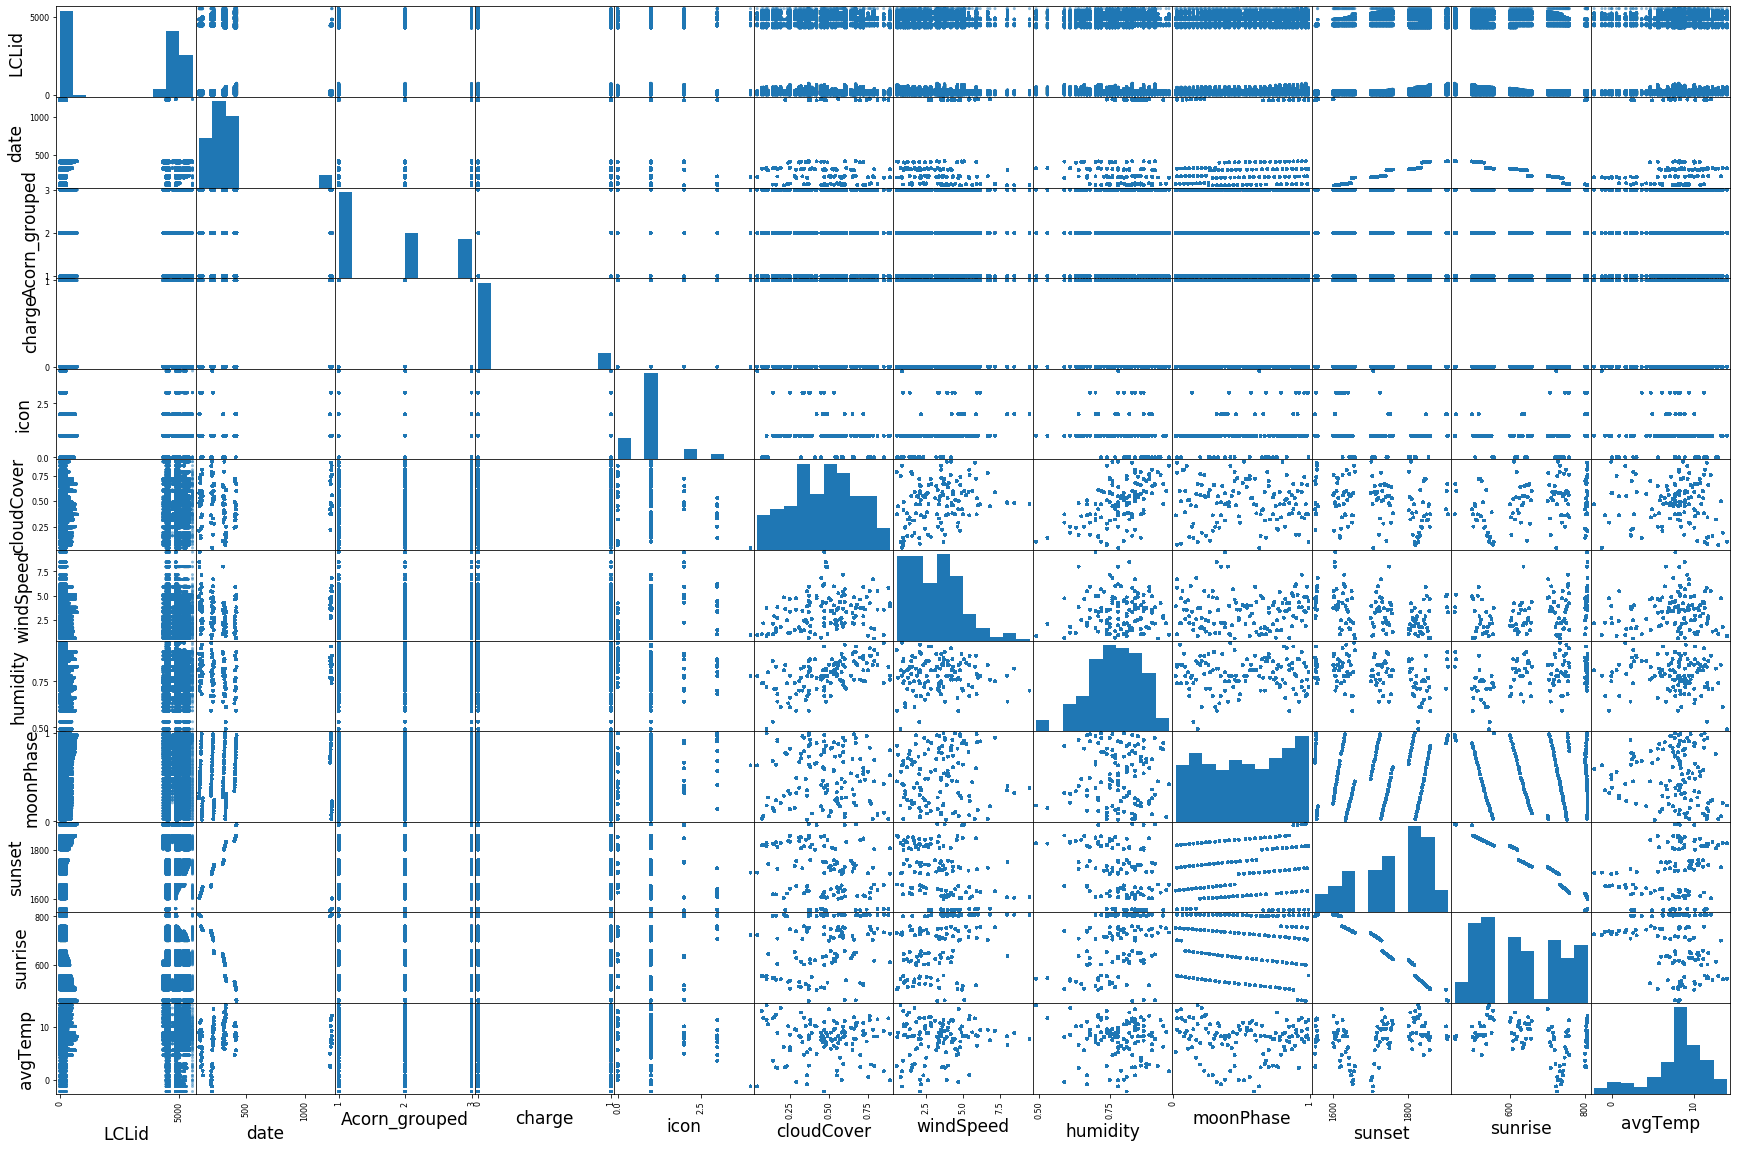

In [37]:
#scatter matrix with only first 100000 rows of data
from pandas.plotting import scatter_matrix

plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
plt.rc('ytick', labelsize=17)
plt.rc('axes', titlesize=17)
plt.rc('axes', labelsize=17)
plt.rc('legend', fontsize=17) 
scatter_matrix(x_reg.iloc[0:100000], figsize=(30,20));

In [38]:
x_reg.corr()

,LCLid,date,Acorn_grouped,charge,icon,cloudCover,windSpeed,humidity,moonPhase,sunset,sunrise,avgTemp
LCLid,1.000000,-0.008811,-0.030888,0.002748,-0.001134,0.003332,-0.000979,0.002136,-0.000825,-0.012181,0.013456,-0.014409
date,-0.008811,1.000000,0.005203,0.002440,0.053742,-0.131288,-0.100432,0.172195,0.032800,-0.218483,0.061795,0.258584
Acorn_grouped,-0.030888,0.005203,1.000000,-0.020593,0.003427,0.003735,0.005191,0.004879,-0.000202,-0.013789,0.013237,-0.007943
charge,0.002748,0.002440,-0.020593,1.000000,0.000740,0.000171,0.001132,-0.000189,0.000096,-0.000274,-0.000060,0.000937
icon,-0.001134,0.053742,0.003427,0.000740,1.000000,0.067929,0.284633,-0.027912,-0.048848,-0.063523,0.072005,-0.025873
cloudCover,0.003332,-0.131288,0.003735,0.000171,0.067929,1.000000,0.166540,0.467812,-0.067484,-0.148565,0.163282,-0.297286
windSpeed,-0.000979,-0.100432,0.005191,0.001132,0.284633,0.166540,1.000000,-0.050061,-0.013285,-0.121910,0.143696,-0.164979
humidity,0.002136,0.172195,0.004879,-0.000189,-0.027912,0.467812,-0.050061,1.000000,-0.029229,-0.536457,0.504410,-0.322175
moonPhase,-0.000825,0.032800,-0.000202,0.000096,-0.048848,-0.067484,-0.013285,-0.029229,1.000000,-0.000132,-0.014860,0.029672
sunset,-0.012181,-0.218483,-0.013789,-0.000274,-0.063523,-0.148565,-0.121910,-0.536457,-0.000132,1.000000,-0.974331,0.654775


>**There are no important correlations between features, only sunset-sunrise(-0.97)**(we can drop one)

In [40]:
x_reg = x_reg.drop(['sunrise'], axis = 1)

<h3>Train-Test set split

Split the dataframe into input features and target feature in order to build the model - LCLid = 131

In [13]:
# split the data
train, test = train_test_split(regression_dataframe[regression_dataframe['LCLid'] == 131][['date','Acorn_grouped','charge','icon','cloudCover','windSpeed','humidity','moonPhase','sunrise','avgTemp','energy_mean']], test_size=0.2, random_state=8)

x_train = train.drop(['energy_mean'], axis=1).values
y_train = train['energy_mean']

x_test = test.drop(['energy_mean'], axis=1).values
y_test = test['energy_mean']

<h3>Linear Regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     65.71
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.68e-77
Time:                        20:54:17   Log-Likelihood:                 986.02
No. Observations:                 623   AIC:                            -1954.
Df Residuals:                     614   BIC:                            -1914.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2.551e-06   6.15e-06     -0.415      0.6

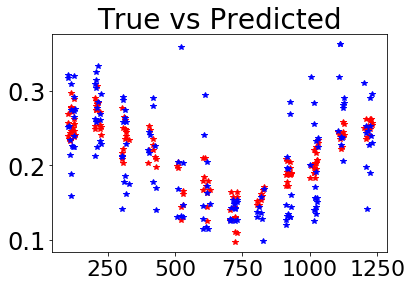

In [14]:
#try linear regression from statsmodel

x_train = sm.add_constant(x_train) # adding a constant
 
model = sm.OLS(np.asarray(y_train), np.asarray(x_train)).fit()
predictions = model.predict(x_test) 
 
print_model = model.summary()
print(print_model)
plt.plot( x_test[:,0], predictions, '*r', x_test[:,0], y_test, '*b')
plt.title("True vs Predicted");

>**R-squared 0.461 is below average, also p-values are bad**

SSE is:  0.38873063435381966


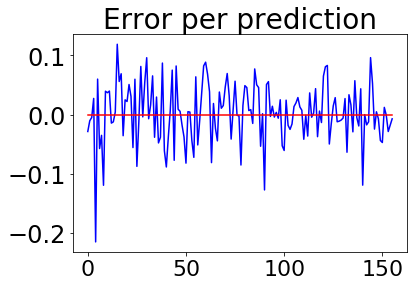

In [15]:
plt.plot(range(0,y_test.shape[0]), predictions - y_test, '-b', range(0,y_test.shape[0]), np.zeros(y_test.shape[0]), '-r')
plt.title("Error per prediction")
print("SSE is: ", np.sum((predictions - y_test)**2))

<h3>Polynomial features

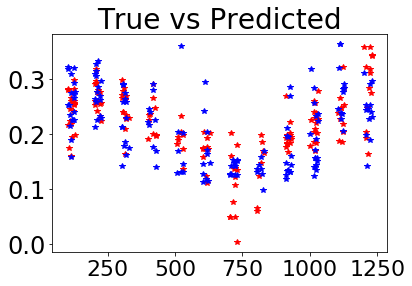

In [16]:
poly = PolynomialFeatures(degree = 2) 
  
X_ = poly.fit_transform(x_train)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(x_test)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
X_ = np.delete(X_,(1),axis=1)
predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = LinearRegression()
#preform the actual regression
clf.fit(X_, y_train)

predictions = clf.predict(predict_)
plt.plot( x_test[:,0], predictions, '*r', x_test[:,0], y_test, '*b')
plt.title("True vs Predicted");

SSE is:  0.5539105334692154


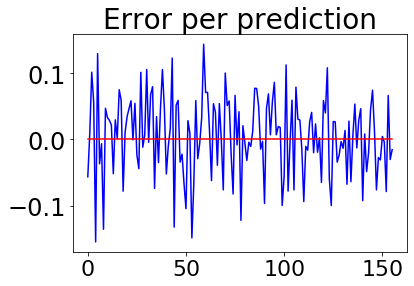

In [17]:
plt.plot(range(0,y_test.shape[0]), predictions - y_test, '-b', range(0,y_test.shape[0]), np.zeros(y_test.shape[0]), '-r')
plt.title("Error per prediction")
print("SSE is: ", np.sum((predictions - y_test)**2))

>**We observe that with higher-order polynomials regression is a bit worse**

<h3>DecisionTreeRegressor

SSE is:  0.6859961517522135


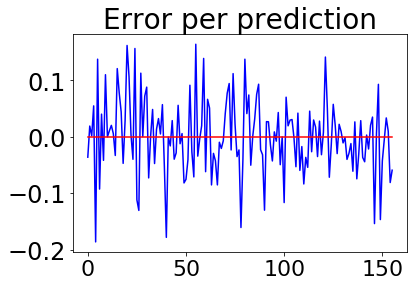

In [18]:
regr = DecisionTreeRegressor()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

plt.plot(range(0,y_test.shape[0]), predictions - y_test, '-b', range(0,y_test.shape[0]), np.zeros(y_test.shape[0]), '-r')
plt.title("Error per prediction")
print("SSE is: ", np.sum((predictions - y_test)**2));

<h3>RandomForestRegressor

SSE is:  0.43592623029022926


C:\Users\james\Anaconda3\envs\pep_env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


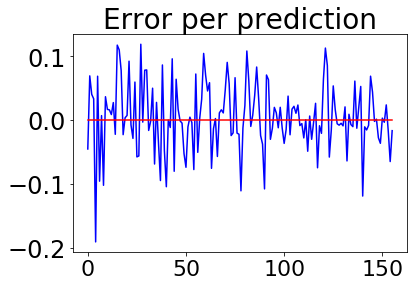

In [19]:
regr = RandomForestRegressor()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

plt.plot(range(0,y_test.shape[0]), predictions - y_test, '-b', range(0,y_test.shape[0]), np.zeros(y_test.shape[0]), '-r')
plt.title("Error per prediction")
print("SSE is: ", np.sum((predictions - y_test)**2))

<h2> Dimensionality Reduction

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scale the datasets
scale_transformer = StandardScaler(copy=True).fit(x_train)
x_train_scaled = scale_transformer.transform(x_train)
x_test_scaled = scale_transformer.transform(x_test)
#now mean is near to zero and Standard deviation = 1

In [21]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [22]:
pca_transformer = PCA().fit(x_train_scaled)
summary = pca_summary(pca_transformer, x_train_scaled)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.488483e+00,2.769476e-01,0.276948
PC2,1.148928e+00,1.650045e-01,0.441952
PC3,1.089874e+00,1.484781e-01,0.590430
PC4,1.016752e+00,1.292232e-01,0.719653
PC5,9.739691e-01,1.185770e-01,0.838230
PC6,8.167770e-01,8.339057e-02,0.921621
PC7,6.281187e-01,4.931664e-02,0.970938
PC8,4.821822e-01,2.906246e-02,1.000000
PC9,1.595239e-16,6.843319e-34,1.000000


<Figure size 432x288 with 0 Axes>

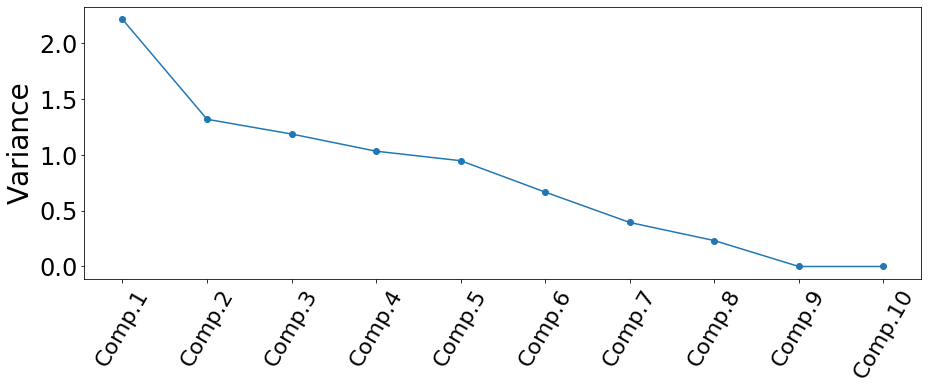

In [23]:
#TO DECIDE HOW MANY PRINCIPAL COMPONENTS TO RETAIN
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    fig = plt.figure()
    ax =  plt.subplots(figsize=(15,5))
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show();

screeplot(pca_transformer, x_train_scaled)

From the graph we can say that the most important pca are the 5 first components(which is the "elbow" of the scree plot)

Another way of deciding how many components to retain is to use Kaiser’s criterion: that we should only retain principal components for which the variance is above 1 (that is for the the first 5 components)

A third way to decide how many principal components to retain is to decide to keep the number of components required to explain at least some minimum amount of the total variance. For example, if it is important to explain at least 80% of the variance.

In [24]:
#Lets try Linear Regression with reduced dimension
pca_transformer = PCA(5).fit(x_train_scaled)
x_train_5d = pca_transformer.transform(x_train_scaled)
x_test_5d =  pca_transformer.transform(x_test_scaled)

# with sklearn
regr = LinearRegression()
regr.fit(x_train_5d, y_train)

print("\t Linear Regression\n")
print("\n------------------------------- SKLEARN with PCA(5)--------------------------------------")
print('Intercept: ', regr.intercept_, '\n')
print('Coefficients: ', regr.coef_, '\n')
print('R^2 for train set: ', regr.score(x_train_5d, y_train), '\n')
print('R^2 for test set: ', regr.score(x_test_5d, y_test), '\n')
print('\n------------------------------- OLS with PCA(5)--------------------------------------\n')
# with statsmodels
X = sm.add_constant(x_train_5d) # adding a constant
 
model = sm.OLS(y_train, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

	 Linear Regression


------------------------------- SKLEARN with PCA(5)--------------------------------------
Intercept:  0.21505735628070433 

Coefficients:  [-0.02767997 -0.00012084 -0.00979096  0.01238046 -0.00584437] 

R^2 for train set:  0.43661442350831375 

R^2 for test set:  0.4170845395813091 


------------------------------- OLS with PCA(5)--------------------------------------

                            OLS Regression Results                            
Dep. Variable:            energy_mean   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     95.63
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           1.58e-74
Time:                        21:02:48   Log-Likelihood:                 972.09
No. Observations:                 623   AIC:                            -1932.
Df Residuals:                     617   BIC:        

<h2>Nonparametric Regression on complete dataset

**Some words about nonparametric Regression**;Nonparametric machine learning algorithms do not rely on assumptions about the shape of the underlying data to work. Nonparametric techniques include decision trees and support vector machines.

**Let's try those algorithms on the complete dataset with every household, maybe they can perform better than LR**

In [72]:
#prepare data - sort them and separate each Acorn group
regression_dataframe1 = regression_dataframe.sort_values(['date'],ascending=True)
x_reg_A = regression_dataframe1[regression_dataframe1['Acorn_grouped'] == 1][['date','Acorn_grouped','charge','icon','cloudCover','windSpeed','humidity','moonPhase','sunset','sunrise','avgTemp','energy_mean']]
x_plot = x_reg_A['date']

y_reg_A = regression_dataframe1[regression_dataframe1['Acorn_grouped'] == 1][['energy_mean']]

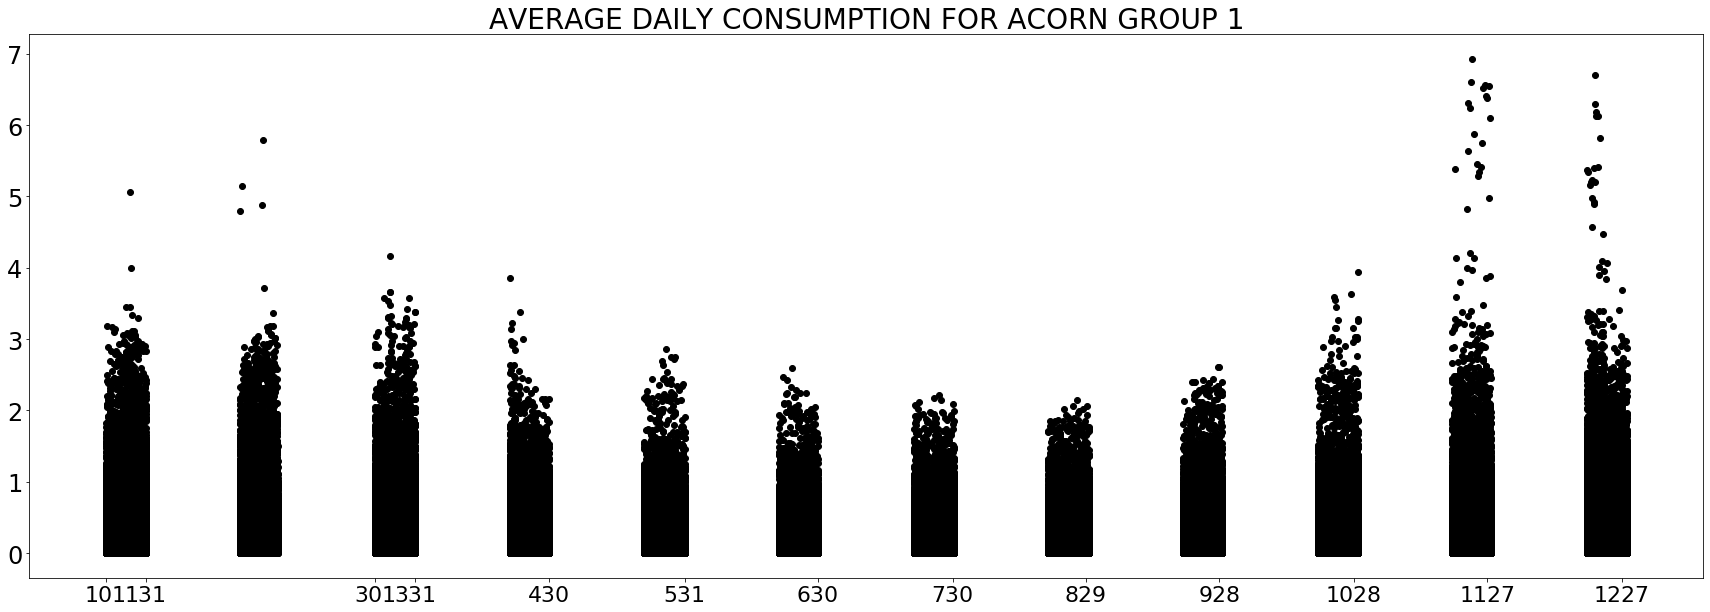

In [73]:
######plot all data ####
fig, ax = plt.subplots(1, figsize=(30, 10))
plt.plot(x_plot, y_reg_A, marker='o', color='black', linewidth=0)
ax.set_xticks(x_reg_A.date.unique()[::30])
plt.title("AVERAGE DAILY CONSUMPTION FOR ACORN GROUP 1");

In [82]:
#split dataset using the index, as we have x, f, and y that we want to split.
itrain, itest = train_test_split(np.arange(x_reg_A.shape[0]), train_size=0.6)

itrain = np.sort(itrain)
itest = np.sort(itest)
xtrain = x_reg_A.iloc[itrain]
ytrain = y_reg_A.iloc[itrain]

xtest = x_reg_A.iloc[itest]
ytest = y_reg_A.iloc[itest]

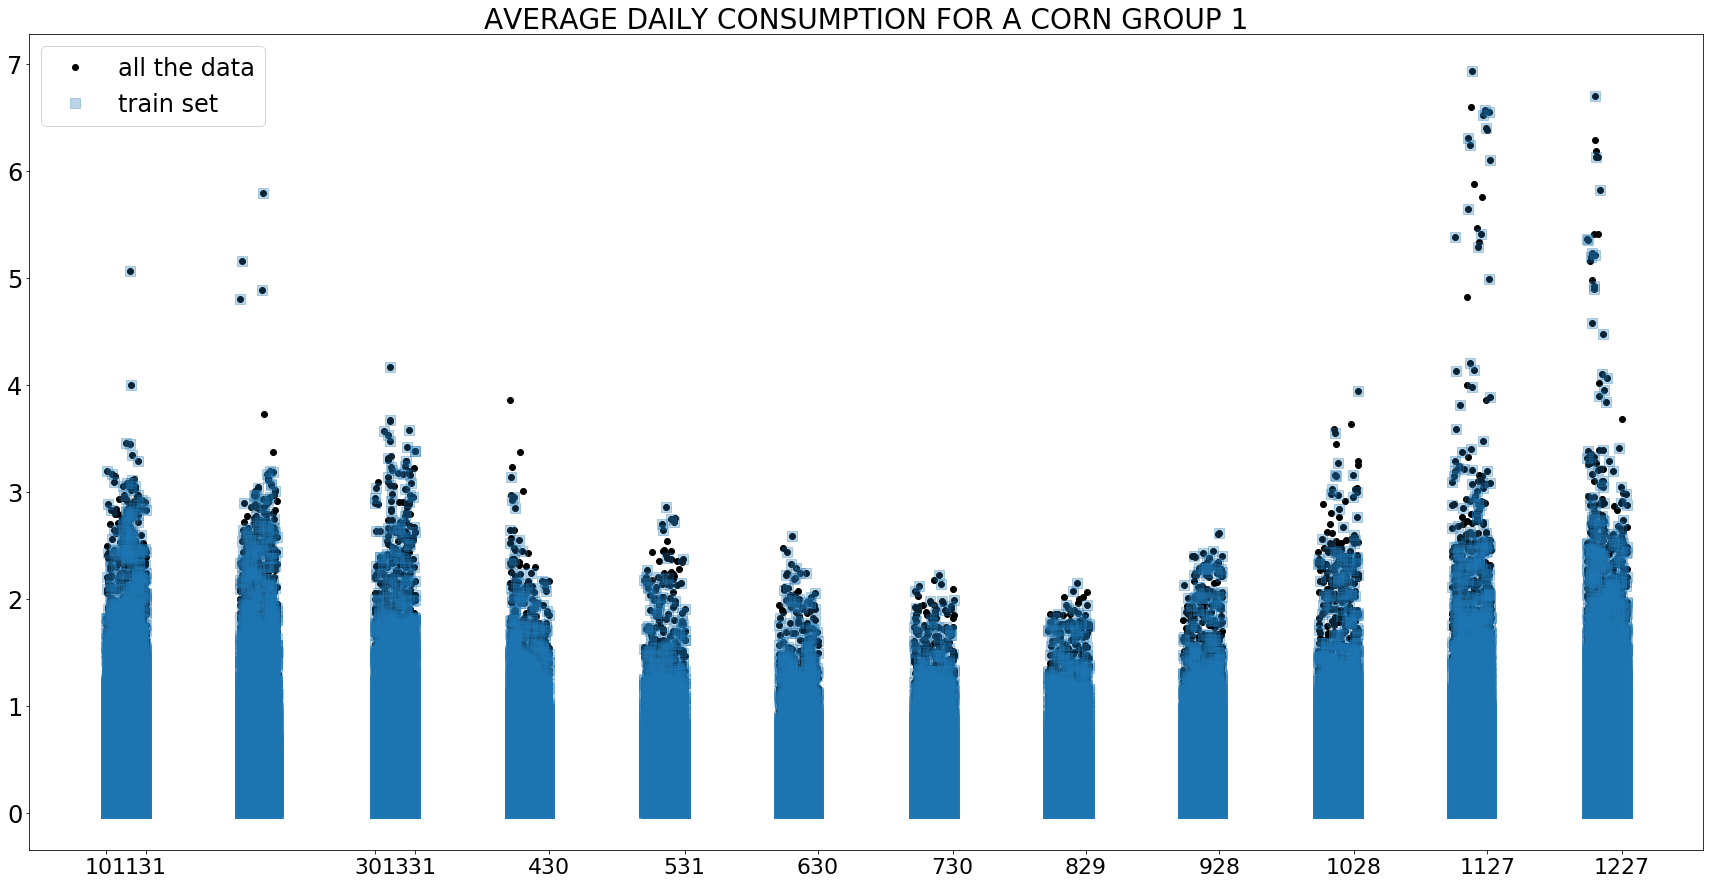

In [83]:
fig, ax = plt.subplots(1, figsize=(30, 15))
ax.plot(x_plot, y_reg_A, marker='o', color='black', linewidth=0, label ="all the data")
ax.plot(xtrain['date'], ytrain, 's', alpha=0.3, ms=10, label="train set")
ax.legend(loc='upper left')
ax.set_xticks(x_reg_A.date.unique()[::30])
plt.title("AVERAGE DAILY CONSUMPTION FOR A CORN GROUP 1")
plt.show();

<h3> Kernel ridge regression

Kernel ridge regression is an extension of ridge regression that uses the kernel trick. In other words, instead of training a ridge regression algorithm on data in its original linear setting, kernel ridge regression has us transform that data to some other complex vector space, learn the features in that space, and then transform back into the space we started in using the kernel trick.

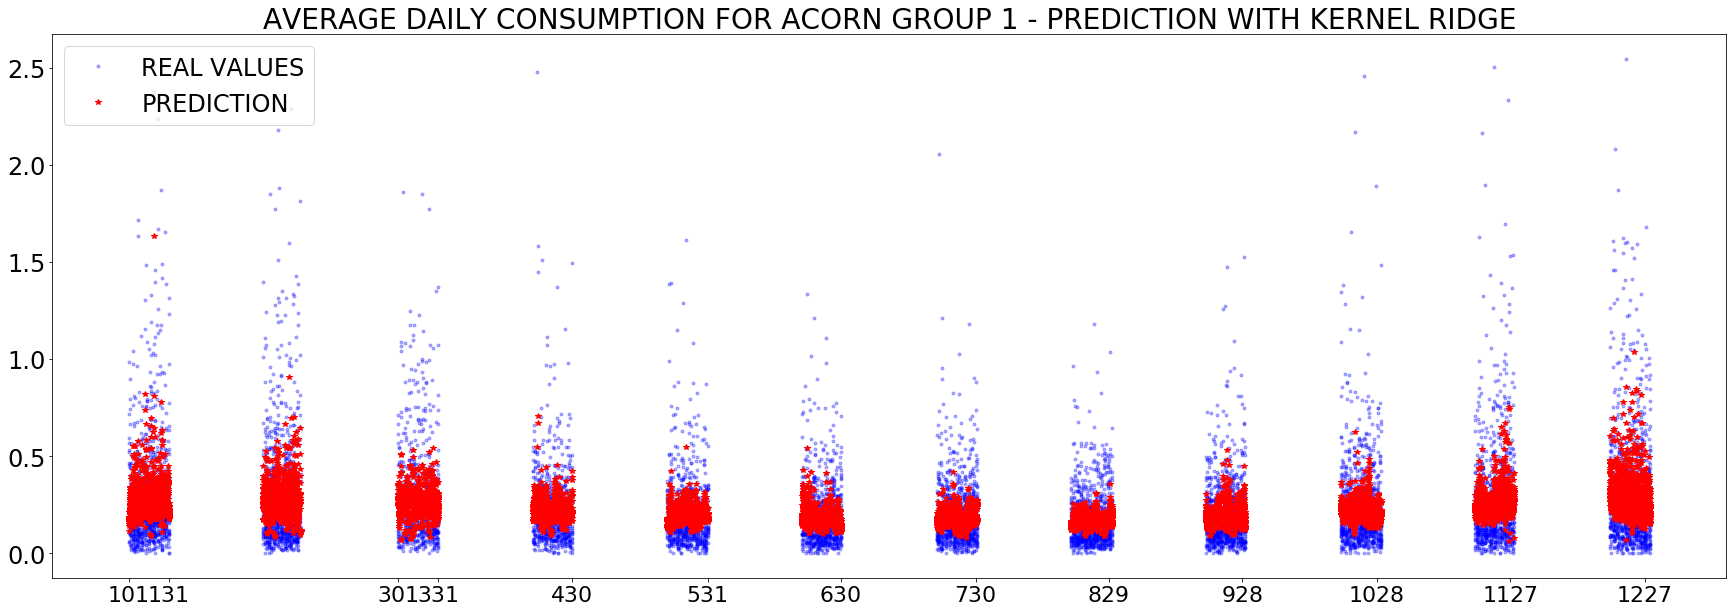

In [84]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge

clf = KernelRidge(kernel='rbf', gamma=0.1)
clf.fit(xtrain[::100], ytrain[::100])
ypred = clf.predict(xtest[::50])

fig, ax = plt.subplots(1, figsize=(30, 10))
ax.plot(xtest[::50]['date'], ytest[::50], 'bo' , alpha=0.3, ms=3, label ="REAL VALUES")
ax.plot(xtest[::50]['date'], ypred, 'r*', label="PREDICTION")
ax.legend(loc='upper left')
ax.set_xticks(x_reg_A.date.unique()[::30])
plt.title("AVERAGE DAILY CONSUMPTION FOR ACORN GROUP 1 - PREDICTION WITH KERNEL RIDGE");

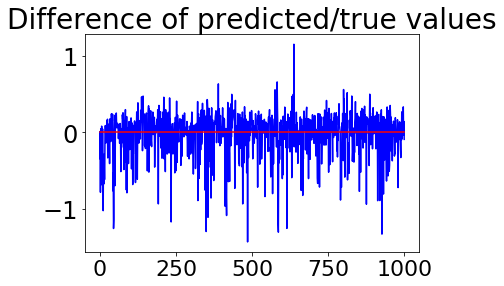

In [87]:
predictions = clf.predict(xtest[::50])

plt.plot(range(0,1000), predictions[0:1000] - ytest[0:1000], '-b', range(0,1000), np.zeros(1000), '-r')
plt.title("Error");

In [88]:
print('Sum square of errors is:', np.sum((predictions[0:1000] - ytest[0:1000])**2))

Sum square of errors is: energy_mean    85.566661
dtype: float64


<h3> Decision Tree Regression

In [96]:
# split the data
train, test = train_test_split(regression_dataframe[['date','Acorn_grouped','charge','icon','cloudCover','windSpeed','humidity','moonPhase','sunset','sunrise','avgTemp','energy_mean']], test_size=0.2, random_state=8)

xplot = train.drop(['energy_mean'], axis=1)
xplot_t = test.drop(['energy_mean'], axis=1)
x_train = train.drop(['energy_mean'], axis=1).values
y_train = train['energy_mean']

x_test = test.drop(['energy_mean'], axis=1).values
y_test = test['energy_mean']
train.columns

Index(['date', 'Acorn_grouped', 'charge', 'icon', 'cloudCover', 'windSpeed',
       'humidity', 'moonPhase', 'sunset', 'sunrise', 'avgTemp', 'energy_mean'],
      dtype='object')

Text(0.5, 1.0, 'Difference of predicted/true values')

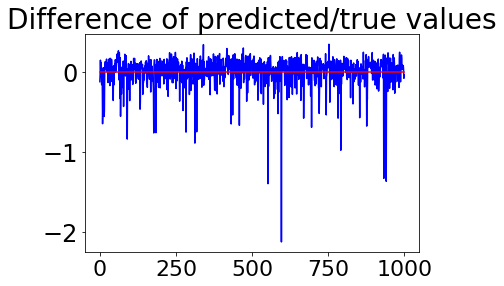

In [97]:
regr = DecisionTreeRegressor()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

plt.plot(range(0,1000), predictions[0:1000] - y_test[0:1000], '-b', range(0,1000), np.zeros(1000), '-r')
plt.title("Error");

In [72]:
print('Sum square of errors is:', np.sum((predictions[0:1000] - y_test[0:1000])**2))

Sum square of errors is: 36.51671509082888


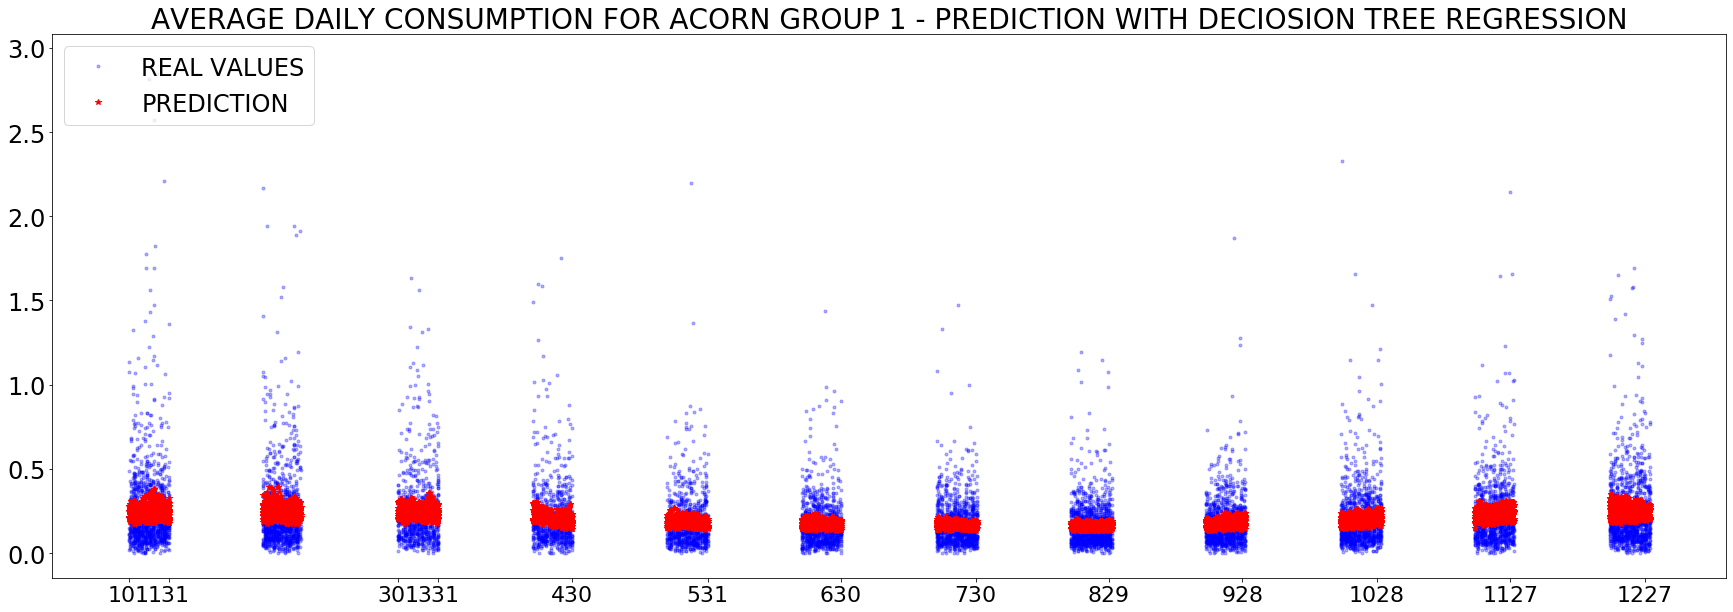

In [98]:
ypred = regr.predict(x_test)
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.plot(xplot_t[::50]['date'], y_test[::50], 'bo' , alpha=0.3, ms=3, label ="REAL VALUES")
ax.plot(xplot_t[::50]['date'], ypred[::50], 'r*', label="PREDICTION")
ax.legend(loc='upper left')
ax.set_xticks(x_reg_A.date.unique()[::30])
plt.title("AVERAGE DAILY CONSUMPTION FOR ACORN GROUP 1 - PREDICTION WITH DECISION TREE REGRESSION");

<h3> Random Forest Regression

C:\Users\ioann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Difference of predicted/true values')

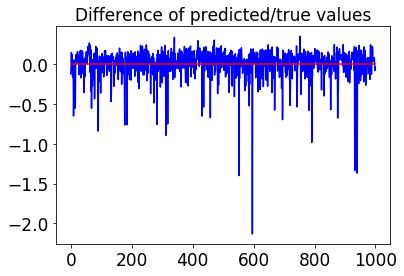

In [73]:
regr = RandomForestRegressor()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

plt.plot(range(0,1000), predictions[0:1000] - y_test[0:1000], '-b', range(0,1000), np.zeros(1000), '-r')
plt.title("Error");

In [74]:
print('Sum square of errors is:', np.sum((predictions[0:1000] - y_test[0:1000])**2))

Sum square of errors is: 36.526412650937615


<h3> K-Nearest-Neighbors Regression

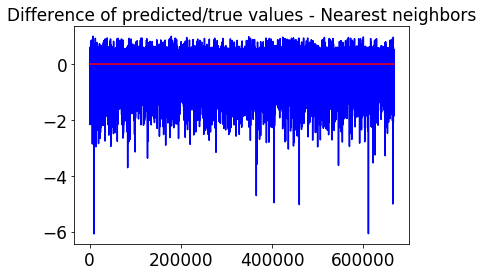

In [75]:
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(x_train, y_train)

predictions = neigh.predict(x_test)
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Error");

>**Unfortunately neither these 2 algorithms can perform accurately on the whole dataset,while trying to predict a specific household, we must work on a specific household dataset**

<h2>Regression - Average town's consumption

>For this model our inputs are:<br> 
**1.icon(day's general weather i.e. mostly cloudy, sunny...)<br> 2.cloudCover<br> 3.humidity<br> 4.sunrise<br> 5.avg Temperature<br> 6.day(integer year-month-day)**<br><br>
Our target is:<br>**London's households' average (half-hourly) electricity consumption daily.**

In [8]:
#load all necessary libraries and models
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [9]:
x_daily = daily_weather.iloc[-828:][['icon', 'cloudCover', 'humidity', 'sunrise', 'avgTemp', 'day']].sort_values(by=['day']).values

# split the data
x_train, x_test, y_train, y_test = train_test_split(x_daily,y , test_size=0.2, random_state=8)

<h3>Linear Regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     247.1
Date:                Tue, 21 Jan 2020   Prob (F-statistic):          1.48e-164
Time:                        20:52:27   Log-Likelihood:                 1591.6
No. Observations:                 662   AIC:                            -3169.
Df Residuals:                     655   BIC:                            -3138.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6165      2.429      5.194      0.0

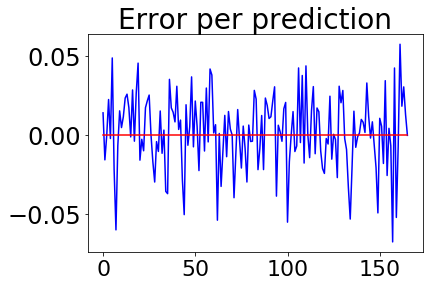

In [10]:
#try linear regression from statsmodel 
model = sm.OLS(np.asarray(y_train), np.asarray(sm.add_constant(x_train))).fit()
predictions = model.predict(sm.add_constant(x_test)) 
 
print_model = model.summary()
print(print_model)
plt.plot(range(0,y_test.shape[0]), predictions - y_test, '-b', range(0,y_test.shape[0]), np.zeros(y_test.shape[0]), '-r')
plt.title("Error per prediction")
print("\n\nSSE is: ", np.sum((predictions - y_test)**2))

>**R-Squared 0.7 and SSE 0.09.**

<h3>Polynomial Regression

SSE is:  0.0876713925355676


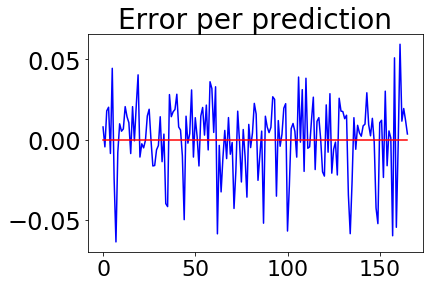

In [40]:
poly = PolynomialFeatures(degree = 2) 
  
X_ = poly.fit_transform(x_train)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(x_test)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
X_ = np.delete(X_,(1),axis=1)
predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = LinearRegression()
#preform the actual regression
clf.fit(X_, y_train)

predictions = clf.predict(predict_)
plt.plot(range(0,y_test.shape[0]), predictions - y_test, '-b', range(0,y_test.shape[0]), np.zeros(y_test.shape[0]), '-r')
plt.title("Error per prediction")
print("SSE is: ", np.sum((predictions - y_test)**2))

>**With 2nd grade polynomial regression, performance is slightly better according to SSE = 0.087**

<h3>Decision Tree

SSE is:  0.04153466651183206


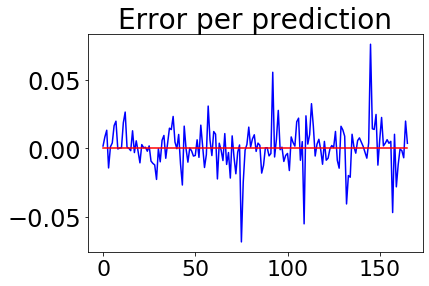

In [47]:
regr = DecisionTreeRegressor()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

plt.plot(range(0,y_test.shape[0]), predictions - y_test, '-b', range(0,y_test.shape[0]), np.zeros(y_test.shape[0]), '-r')
plt.title("Error per prediction");
print("SSE is: ", np.sum((predictions - y_test)**2))

>**Decision tree is superior to both the above (SSE = 0.04)**

<h3> Random Forest

SSE is:  0.024832138800559532


C:\Users\james\Anaconda3\envs\pep_env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


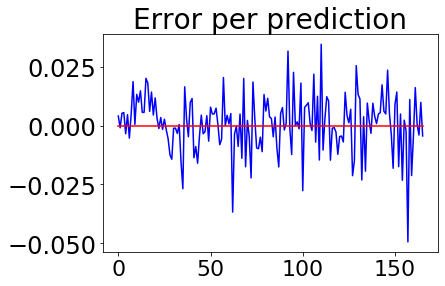

In [48]:
regr = RandomForestRegressor()
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

plt.plot(range(0,y_test.shape[0]), predictions - y_test, '-b', range(0,y_test.shape[0]), np.zeros(y_test.shape[0]), '-r')
plt.title("Error per prediction")
print("SSE is: ", np.sum((predictions - y_test)**2))

>**Random forest is the most accurate with SSE of 0.02**

<h3> K-Nearest-Neighbors

SSE is:  0.016637880366980547


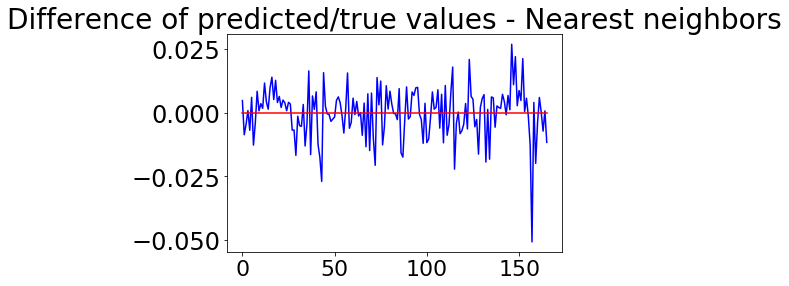

In [60]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train, y_train)

predictions = neigh.predict(x_test)
plt.plot(range(0,y_test.shape[0]),predictions - y_test, 'b', range(0,y_test.shape[0]),np.zeros(y_test.shape[0]), 'r')
plt.title("Difference of predicted/true values - Nearest neighbors")
print("SSE is: ", np.sum((predictions - y_test)**2))

>**K-Nearest-Neighbors (for k=5) also performs great with SSE = 0.016**

>**CONCLUSION:<br> Nonparametric models deliver very promising results on predicting the daily average consumption of all households, which is crucial for energy management issues of a smart city**

<h2> Conclusion

>**Predicting the average daily overall consumption proved pretty successful , especially using nonparametric models. On the other hand, building a regression model on a specific household's daily consumption proved much tougher.**

>**That being said, we think it would be useful to get short-term data such as a household's routine (schedule of work, residents' scheduled absence etc) in order to be able to build an accurate model for a single household.**

<h2> Future expansions

>**Given the time and computing power, we can build models on half-hourly consumption, useful for the suppliers to prevent power blackouts and manage energy even more efficiently and also for a specific household owner to be aware in case of energy wastage scenario (Smart Home concept)**